# Drips

This example identifies which repos from the Dependency Graph have been targeted by Drips splits. View the full data dump [here](https://docs.google.com/spreadsheets/d/1xQ4SfHikMprlAbBfh1ptA9Zm8gqcJdqcaDVY35d9Xp8/edit?usp=sharing).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_graph = pd.read_csv('data/unweighted_graph.csv', index_col=0)
nodes = set(df_graph['package_repo_name'].dropna()).union(set(df_graph['seed_repo_name'].dropna()))
len(nodes)

4284

In [3]:
df_drips = pd.read_csv('data/drips/Drips Data Dump 10.12.2024 - GitProjects.csv')
df_drips['name'] = df_drips['name'].str.lower()
drip_repos = set(df_drips['name'])
len(drip_repos)

515

In [4]:
len(drip_repos.intersection(nodes))

62

In [5]:
dff_graph = df_graph[df_graph['package_repo_name'].isin(drip_repos)]
dff_graph

,seed_repo_name,seed_repo_owner,package_name,package_repo_owner,package_repo_name,package_source
118,erigontech/erigon,erigontech,github.com/go-chi/chi/v5,go-chi,go-chi/chi,GO
675,prysmaticlabs/prysm,prysmaticlabs,github.com/burntsushi/toml,burntsushi,burntsushi/toml,GO
690,status-im/nimbus-eth2,status-im,notebook,jupyter,jupyter/notebook,PIP
694,status-im/nimbus-eth2,status-im,pandas,pandas-dev,pandas-dev/pandas,PIP
747,status-im/nimbus-eth2,status-im,networkx,networkx,networkx/networkx,PIP
...,...,...,...,...,...,...
13752,ethereumjs/ethereumjs-monorepo,ethereumjs,@vitest/mocker,vitest-dev,vitest-dev/vitest,NPM
13758,ethereumjs/ethereumjs-monorepo,ethereumjs,@typescript-eslint/types,typescript-eslint,typescript-eslint/typescript-eslint,NPM
13772,ethereumjs/ethereumjs-monorepo,ethereumjs,@rollup/rollup-linux-x64-musl,rollup,rollup/rollup,NPM
13780,ethereumjs/ethereumjs-monorepo,ethereumjs,@rollup/rollup-android-arm-eabi,rollup,rollup/rollup,NPM


Text(0, 0.5, 'Package Dependency')

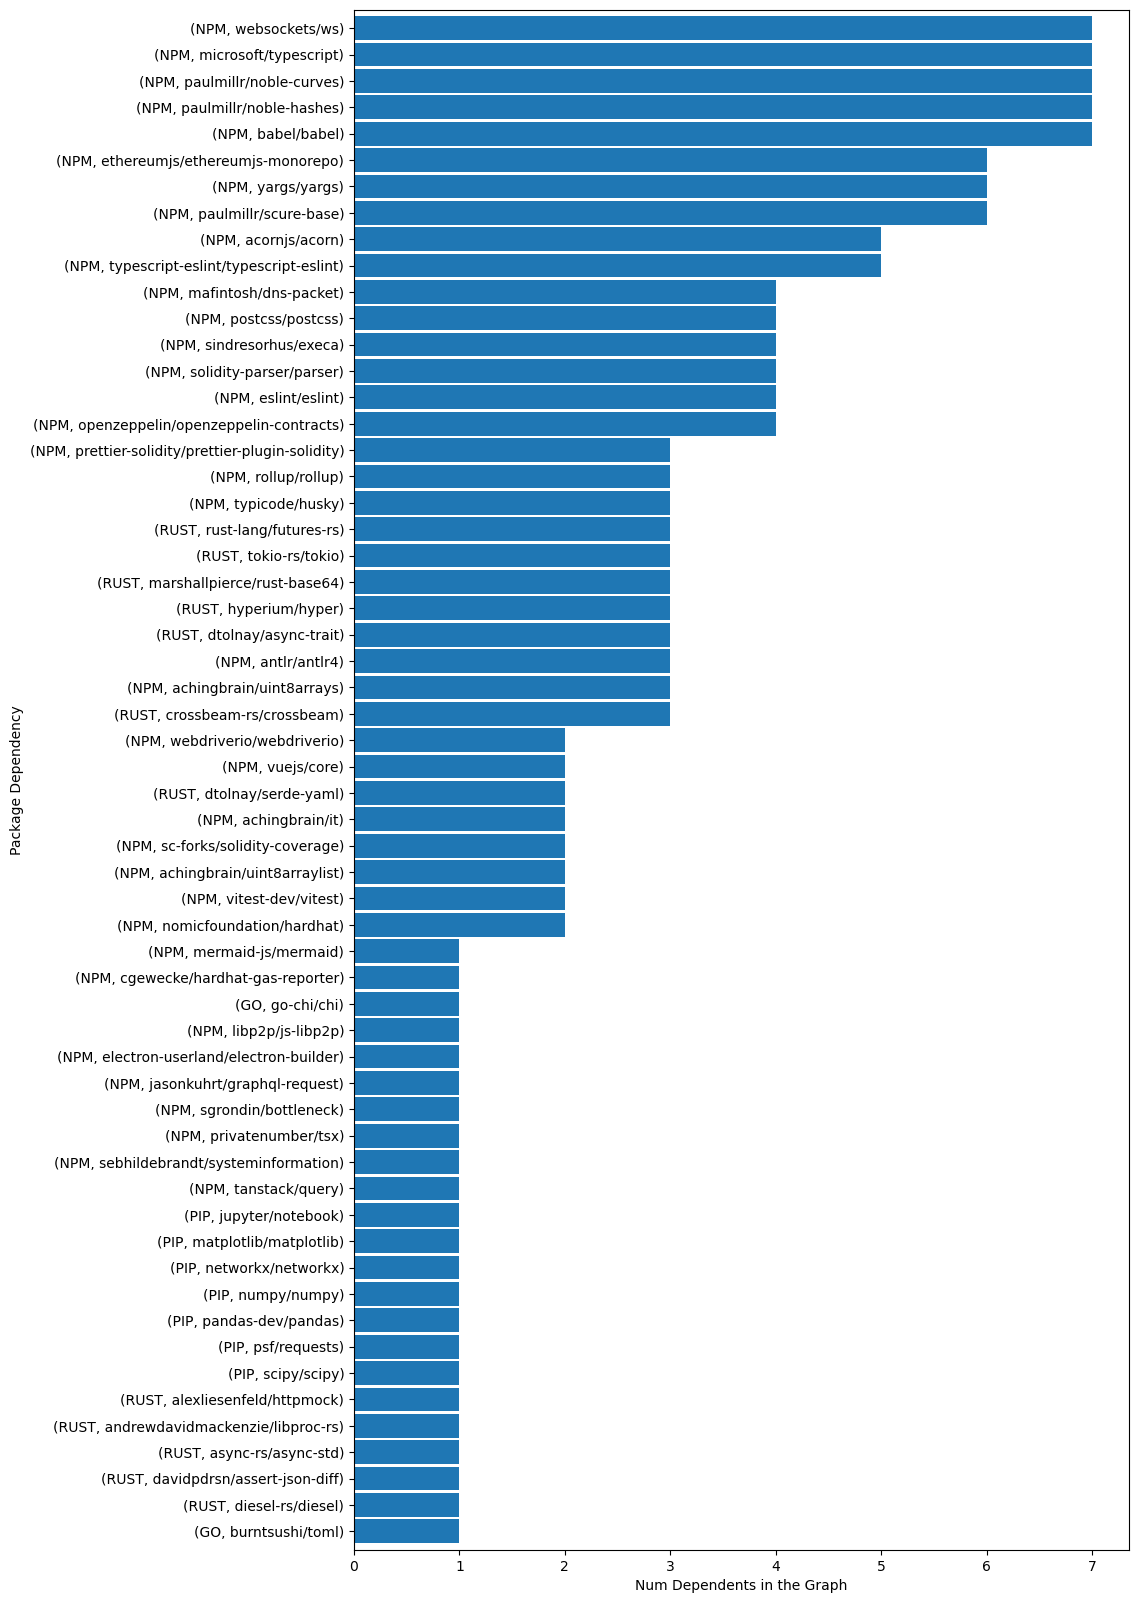

In [6]:
fig, ax = plt.subplots(figsize=(10, 20))
(
    dff_graph
    .groupby(['package_source', 'package_repo_name'])['seed_repo_name']
    .nunique()
    .sort_values()
    .plot(kind='barh', width=.9)
)
ax.set_xlabel('Num Dependents in the Graph')
ax.set_ylabel('Package Dependency')